Randomized Optimization:

Part 1, knapsack




In [1]:
!pip install mlrose-hiive

     |████████████████████████████████| 51kB 2.5MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-cp37-none-any.whl size=98351 sha256=628e4d0b3a455d0135c58ce427faf4391e66cfbef27d8cd9e7fc6b2c12d7c831
  Stored in directory: /root/.cache/pip/wheels/7c/42/31/77944bb5cb941be07e4a96e0c112ae32c8d27017c5f31459de
Successfully built mlrose-hiive


In [2]:

import mlrose_hiive as ml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SEED = 5


the fitness curve is the fitness score, and the number of fitness evals run


Tuning Hyperparameters rhc, testing 


max_attempts 10, 15, 20

In [3]:
np.random.seed(SEED)
PROBLEM_SIZE = 10


In [4]:
fitness_curve_df = pd.DataFrame()
i = 10
while i < 31:
  PROBLEM_SIZE = 10
  problem = ml.KnapsackGenerator.generate(SEED,number_of_items_types= PROBLEM_SIZE)
  schedule = ml.ExpDecay()
  np.random.seed(SEED)
  init_state = np.random.randint(2, size=PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.random_hill_climb(problem,max_attempts=i,max_iters=300,restarts=15,init_state=init_state,curve=True,random_state=5)
  
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "max_iters"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+5

CPU times: user 22.7 ms, sys: 1.91 ms, total: 24.6 ms
Wall time: 24.9 ms
CPU times: user 31.8 ms, sys: 906 µs, total: 32.7 ms
Wall time: 33.3 ms
CPU times: user 31.9 ms, sys: 0 ns, total: 31.9 ms
Wall time: 31.9 ms
CPU times: user 31.9 ms, sys: 875 µs, total: 32.7 ms
Wall time: 32.8 ms
CPU times: user 43.2 ms, sys: 0 ns, total: 43.2 ms
Wall time: 43.9 ms


    Score10  max_iters10
0      41.0         97.0
1      65.0         99.0
2      80.0        101.0
3      81.0        103.0
4      81.0        104.0
5     113.0        106.0
6     113.0        107.0
7     129.0        109.0
8     129.0        110.0
9     131.0        112.0
10    137.0        114.0
11    137.0        115.0
12    137.0        116.0
13    137.0        117.0
14    137.0        118.0
15    137.0        119.0
16    137.0        120.0
17    137.0        121.0
18    137.0        122.0
19    137.0        123.0
20    137.0        124.0
    Score15  max_iters15
0      13.0         77.0
1      15.0         79.0
2      33.0         81.0
3      33.0         82.0
4      40.0         84.0
5      42.0         86.0
6      45.0         88.0
7      66.0         90.0
8      82.0         92.0
9      82.0         93.0
10     82.0         94.0
11    102.0         96.0
12    102.0         97.0
13    108.0         99.0
14    108.0        100.0
15    108.0        101.0
16    108.0        102.0


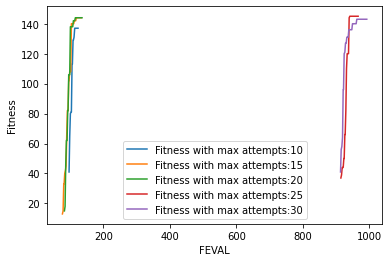

In [5]:
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with max attempts:'+str(10+(i*5)))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.legend()

In [6]:
fitness_curve_df = pd.DataFrame()
i = 5
while i < 26:
  PROBLEM_SIZE = i
  problem = ml.KnapsackGenerator.generate(SEED,number_of_items_types= PROBLEM_SIZE)
  schedule = ml.ExpDecay()
  np.random.seed(SEED)
  init_state = np.random.randint(2, size=PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.random_hill_climb(problem,max_attempts=25,max_iters=300,restarts=15,init_state=init_state,curve=True,random_state=5)
  
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+5

CPU times: user 29.7 ms, sys: 0 ns, total: 29.7 ms
Wall time: 30 ms
CPU times: user 35.2 ms, sys: 0 ns, total: 35.2 ms
Wall time: 35.2 ms
CPU times: user 48.4 ms, sys: 29 µs, total: 48.4 ms
Wall time: 48.4 ms
CPU times: user 78.2 ms, sys: 4.45 ms, total: 82.6 ms
Wall time: 76.3 ms
CPU times: user 70.5 ms, sys: 0 ns, total: 70.5 ms
Wall time: 74.7 ms


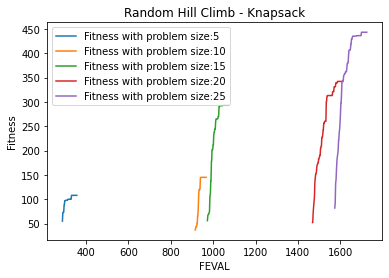

In [8]:


count = 5
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  #print(temp_df)
  
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with problem size:'+str(count))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
  count = count +5
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.title('Random Hill Climb - Knapsack')
plt.legend()

In [ ]:
hp tuning, SA npeaks: schedules

In [ ]:
fitness_curve_df = pd.DataFrame()
i = 0
while i < 2:
  PROBLEM_SIZE = 10
  problem = ml.KnapsackGenerator.generate(SEED,number_of_items_types= PROBLEM_SIZE)
  init_state = np.random.randint(2, size=PROBLEM_SIZE)
  schedule = ml.GeomDecay()
  if i ==0:
    schedule = ml.ExpDecay()
  
  %time best_state, best_fitness, fitness_curve = ml.simulated_annealing(problem,schedule=schedule,max_attempts=15,max_iters=1000,init_state=init_state,curve=True,random_state=5,fevals=True)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+1

CPU times: user 2.89 ms, sys: 0 ns, total: 2.89 ms
Wall time: 2.91 ms
CPU times: user 3.51 ms, sys: 49 µs, total: 3.55 ms
Wall time: 3.49 ms


    Score0  Fevals0
0     23.0      3.0
1     25.0      5.0
2     26.0      7.0
3     31.0      9.0
4     35.0     11.0
5     36.0     13.0
6     37.0     15.0
7     39.0     17.0
8     39.0     18.0
9     41.0     20.0
10    53.0     22.0
11    77.0     24.0
12    84.0     26.0
13    84.0     27.0
14    92.0     29.0
15    92.0     30.0
16    92.0     31.0
17    92.0     32.0
18    92.0     33.0
19    94.0     35.0
20    94.0     36.0
21    94.0     37.0
22    94.0     38.0
23    94.0     39.0
24    94.0     40.0
25    94.0     41.0
26   101.0     43.0
27   101.0     44.0
28   106.0     46.0
29   107.0     48.0
30   107.0     49.0
31   107.0     50.0
32   107.0     51.0
33   107.0     52.0
34   107.0     53.0
35   107.0     54.0
36   107.0     55.0
37   107.0     56.0
38   107.0     57.0
39   107.0     58.0
40   107.0     59.0
41   107.0     60.0
42   107.0     61.0
43   107.0     62.0
44   107.0     63.0
    Score1  Fevals1
0     23.0      3.0
1     25.0      5.0
2     26.0      7.0


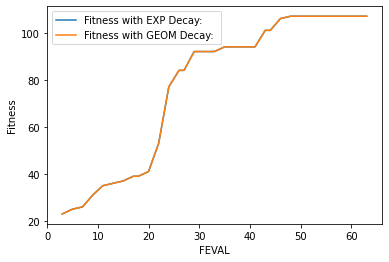

In [ ]:
for i in range(2):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  
  if i==0:
    plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with EXP Decay: ')
  else:
    plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with GEOM Decay: ')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.legend()

In [9]:
import matplotlib.pyplot as plt
fitness_curve_df = pd.DataFrame()
i = 5
while i < 26:
  PROBLEM_SIZE = i
  
  problem = ml.KnapsackGenerator.generate(SEED,number_of_items_types= PROBLEM_SIZE)
  np.random.seed(SEED)
  init_state = np.random.randint(2, size=PROBLEM_SIZE)
  schedule = ml.ExpDecay()
  
  
  %time best_state, best_fitness, fitness_curve = ml.simulated_annealing(problem,schedule=schedule,max_attempts=15,max_iters=1000,init_state=init_state,curve=True,random_state=5,fevals=True)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+5
  

CPU times: user 1.66 ms, sys: 0 ns, total: 1.66 ms
Wall time: 1.67 ms
CPU times: user 2.73 ms, sys: 0 ns, total: 2.73 ms
Wall time: 2.8 ms
CPU times: user 6.44 ms, sys: 70 µs, total: 6.51 ms
Wall time: 5.61 ms
CPU times: user 5.76 ms, sys: 1.1 ms, total: 6.85 ms
Wall time: 5.76 ms
CPU times: user 9.55 ms, sys: 186 µs, total: 9.74 ms
Wall time: 8.11 ms


    Score5  Fevals5
0     25.0      3.0
1     26.0      5.0
2     26.0      6.0
3     26.0      7.0
4     58.0      9.0
5     78.0     11.0
6     80.0     13.0
7     80.0     14.0
8     80.0     15.0
9     80.0     16.0
10    90.0     18.0
11    90.0     19.0
12    90.0     20.0
13    90.0     21.0
14    90.0     22.0
15    90.0     23.0
16    90.0     24.0
17    90.0     25.0
18    90.0     26.0
19    90.0     27.0
20    90.0     28.0
21    90.0     29.0
22    90.0     30.0
23    90.0     31.0
24    90.0     32.0
25    90.0     33.0
    Score10  Fevals10
0      17.0       3.0
1      20.0       5.0
2      21.0       7.0
3      26.0       9.0
4      30.0      11.0
5      31.0      13.0
6      32.0      15.0
7      34.0      17.0
8      34.0      18.0
9      36.0      20.0
10     54.0      22.0
11     70.0      24.0
12     84.0      26.0
13     84.0      27.0
14     92.0      29.0
15     92.0      30.0
16     92.0      31.0
17     92.0      32.0
18     92.0      33.0
19     94.0      35.

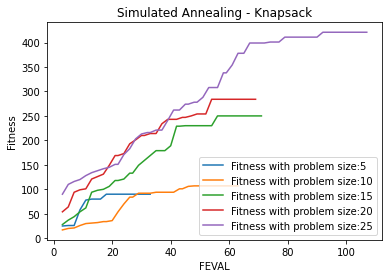

In [10]:
count = 5
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with problem size:'+str(count))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
  count = count +5
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.title('Simulated Annealing - Knapsack')
plt.legend()


GA HP Tuning, pop size 100-500, by 100s. 400 sweet spot between hitting max score and number of fevals to get there.

In [ ]:
fitness_curve_df = pd.DataFrame()
i = 100
while i < 501:
  PROBLEM_SIZE = 10
  problem = ml.KnapsackGenerator.generate(SEED,number_of_items_types= PROBLEM_SIZE)
  np.random.seed(SEED)
  init_state = np.random.randint(2, size=PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.genetic_alg(problem,pop_size=i,max_attempts=10,curve=True,random_state=5)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+100

CPU times: user 255 ms, sys: 2.01 ms, total: 257 ms
Wall time: 258 ms
CPU times: user 547 ms, sys: 948 µs, total: 548 ms
Wall time: 549 ms
CPU times: user 874 ms, sys: 3.93 ms, total: 878 ms
Wall time: 877 ms
CPU times: user 1.04 s, sys: 0 ns, total: 1.04 s
Wall time: 1.04 s
CPU times: user 1.46 s, sys: 6 ms, total: 1.47 s
Wall time: 1.47 s


    Score100  Fevals100
0      135.0      202.0
1      137.0      304.0
2      137.0      405.0
3      137.0      506.0
4      138.0      608.0
5      142.0      710.0
6      142.0      811.0
7      144.0      913.0
8      152.0     1015.0
9      152.0     1116.0
10     152.0     1217.0
11     152.0     1318.0
12     152.0     1419.0
13     152.0     1520.0
14     152.0     1621.0
15     152.0     1722.0
16     152.0     1823.0
17     152.0     1924.0
18     152.0     2025.0
19     152.0     2126.0
20     152.0     2227.0
21     152.0     2328.0
22     152.0     2429.0
23     152.0     2530.0
24     152.0     2631.0
25     152.0     2732.0
26     152.0     2833.0
27     152.0     2934.0
28     152.0     3035.0
    Score200  Fevals200
0      135.0      402.0
1      135.0      603.0
2      143.0      805.0
3      143.0     1006.0
4      143.0     1207.0
5      151.0     1409.0
6      151.0     1610.0
7      151.0     1811.0
8      151.0     2012.0
9      151.0     2213.0
10     151.0    

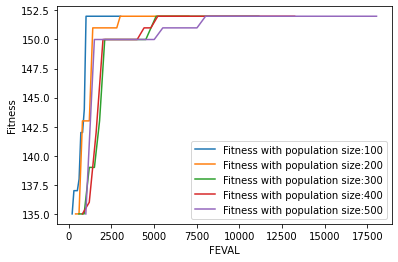

In [ ]:

for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with population size:'+str(100+(i*100)))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
  count = count *2
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.legend()

In [12]:
fitness_curve_df = pd.DataFrame()
i = 5
while i < 26:
  PROBLEM_SIZE = i
  problem = ml.KnapsackGenerator.generate(SEED,number_of_items_types= PROBLEM_SIZE)
  np.random.seed(SEED)
  init_state = np.random.randint(2, size=PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.genetic_alg(problem,pop_size=100,max_attempts=10,curve=True,random_state=5)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+5

CPU times: user 99 ms, sys: 2.04 ms, total: 101 ms
Wall time: 104 ms
CPU times: user 157 ms, sys: 888 µs, total: 158 ms
Wall time: 159 ms
CPU times: user 326 ms, sys: 4.8 ms, total: 331 ms
Wall time: 331 ms
CPU times: user 400 ms, sys: 0 ns, total: 400 ms
Wall time: 401 ms
CPU times: user 446 ms, sys: 3.02 ms, total: 449 ms
Wall time: 452 ms


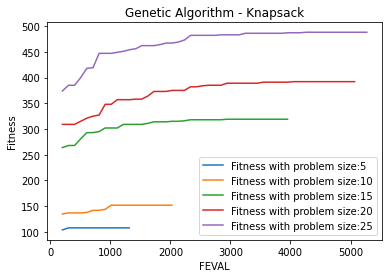

In [13]:
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  #print(temp_df)
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with problem size:'+str(5+(i*5)))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.title('Genetic Algorithm - Knapsack')
plt.legend()

HP TUning MIMIC, npeaks
: 

In [ ]:
fitness_curve_df = pd.DataFrame()
i = 1
while i < 6:
  PROBLEM_SIZE = 10
  problem = ml.KnapsackGenerator.generate(SEED,number_of_items_types= PROBLEM_SIZE)
  np.random.seed(SEED)
  init_state = np.random.randint(2, size=PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.mimic(problem,pop_size=200,keep_pct=i/10,max_attempts=15,curve=True,random_state=5)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+1

CPU times: user 917 ms, sys: 3.02 ms, total: 920 ms
Wall time: 933 ms
CPU times: user 899 ms, sys: 950 µs, total: 900 ms
Wall time: 902 ms
CPU times: user 1.15 s, sys: 1.98 ms, total: 1.16 s
Wall time: 1.16 s
CPU times: user 1.37 s, sys: 4.08 ms, total: 1.38 s
Wall time: 1.38 s
CPU times: user 967 ms, sys: 0 ns, total: 967 ms
Wall time: 973 ms


    Score1  Fevals1
0    135.0    402.0
1    144.0    604.0
2    144.0    805.0
3    144.0   1006.0
4    144.0   1207.0
5    144.0   1408.0
6    144.0   1609.0
7    144.0   1810.0
8    144.0   2011.0
9    144.0   2212.0
10   144.0   2413.0
11   144.0   2614.0
12   144.0   2815.0
13   144.0   3016.0
14   144.0   3217.0
15   144.0   3418.0
16   144.0   3619.0
    Score2  Fevals2
0    131.0    402.0
1    151.0    604.0
2    151.0    805.0
3    151.0   1006.0
4    151.0   1207.0
5    151.0   1408.0
6    151.0   1609.0
7    151.0   1810.0
8    151.0   2011.0
9    151.0   2212.0
10   151.0   2413.0
11   151.0   2614.0
12   151.0   2815.0
13   151.0   3016.0
14   151.0   3217.0
15   151.0   3418.0
16   151.0   3619.0
    Score3  Fevals3
0    141.0    402.0
1    143.0    604.0
2    143.0    805.0
3    144.0   1007.0
4    148.0   1209.0
5    148.0   1410.0
6    150.0   1612.0
7    150.0   1813.0
8    150.0   2014.0
9    150.0   2215.0
10   150.0   2416.0
11   150.0   2617.0
12   150.0   2818.0


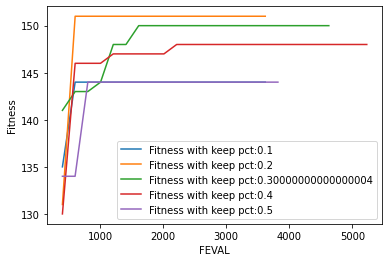

In [ ]:
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with keep pct:'+str(.1+(i/10)))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.legend()

In [14]:
fitness_curve_df = pd.DataFrame()
i = 5
while i < 26:
  PROBLEM_SIZE = i
  problem = ml.KnapsackGenerator.generate(SEED,number_of_items_types= PROBLEM_SIZE)
  np.random.seed(SEED)
  init_state = np.random.randint(2, size=PROBLEM_SIZE)
  %time best_state, best_fitness, fitness_curve = ml.mimic(problem,pop_size=200,keep_pct=0.2,max_attempts=15,curve=True,random_state=5)
  temp_df = pd.DataFrame(fitness_curve)
  temp_df = temp_df.rename({0: "Score"+str(i), 1: "Fevals"+str(i)}, axis='columns')
  
  fitness_curve_df = pd.concat([fitness_curve_df,temp_df])
  
  i = i+5

CPU times: user 292 ms, sys: 0 ns, total: 292 ms
Wall time: 303 ms
CPU times: user 888 ms, sys: 3.8 ms, total: 892 ms
Wall time: 894 ms
CPU times: user 2.57 s, sys: 2.95 ms, total: 2.57 s
Wall time: 2.59 s
CPU times: user 4.65 s, sys: 326 µs, total: 4.65 s
Wall time: 4.65 s
CPU times: user 6.69 s, sys: 4.22 ms, total: 6.69 s
Wall time: 6.72 s


    Score5  Fevals5
0    107.0    402.0
1    108.0    604.0
2    108.0    805.0
3    108.0   1006.0
4    108.0   1207.0
5    108.0   1408.0
6    108.0   1609.0
7    108.0   1810.0
8    108.0   2011.0
9    108.0   2212.0
10   108.0   2413.0
11   108.0   2614.0
12   108.0   2815.0
13   108.0   3016.0
14   108.0   3217.0
15   108.0   3418.0
16   108.0   3619.0
    Score10  Fevals10
0     131.0     402.0
1     151.0     604.0
2     151.0     805.0
3     151.0    1006.0
4     151.0    1207.0
5     151.0    1408.0
6     151.0    1609.0
7     151.0    1810.0
8     151.0    2011.0
9     151.0    2212.0
10    151.0    2413.0
11    151.0    2614.0
12    151.0    2815.0
13    151.0    3016.0
14    151.0    3217.0
15    151.0    3418.0
16    151.0    3619.0
    Score15  Fevals15
0     282.0     402.0
1     293.0     604.0
2     300.0     806.0
3     303.0    1008.0
4     311.0    1210.0
5     311.0    1411.0
6     311.0    1612.0
7     316.0    1814.0
8     316.0    2015.0
9     316.0    2216.0
10

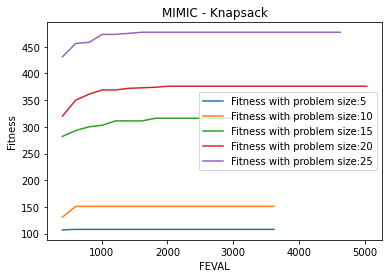

In [15]:
for i in range(5):
  temp_df = fitness_curve_df.iloc[:,i*2:i*2+2]
  temp_df = temp_df.dropna()
  print(temp_df)
  plt.plot(temp_df.iloc[:,1],temp_df.iloc[:,0],label='Fitness with problem size:'+str(5+(i*5)))
  #plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
plt.ylabel('Fitness')
plt.xlabel("FEVAL")
plt.title('MIMIC - Knapsack')
plt.legend()